# Project: Build a Traffic Sign Recognition Classifier

the project using The GTSRB image Data, which could download from http://benchmark.ini.rub.de/, 
all data could download from https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html

# Step 0: Load The GTSRB image Data

In [8]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import cv2 
import matplotlib.image as mpimg

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    dim = (32, 32)
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header next(reader)
        # loop over all images in current annotations file
        for row in gtReader:
            img = cv2.imread(prefix + row[0])
            resized = cv2.resize(img, dim)                             
            images.append(resized) # the 1th column is the filename
            labels.append(int(row[7])) # the 8th column is the label
        gtFile.close()
    return images, labels

39209 39209


'Spe'

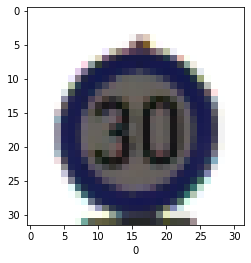

In [66]:
class_names = "Speed limit(20km/h),Speed limit(30km/h),Speed limit(50km/h),Speed limit(60km/h),Speed limit(70km/h),Speed limit(80km/h),\
End of speed limit(80km/h),Speed limit(100km/h),Speed limit(120km/h),No passing,No passing veh over 3.5 tons,Right-of-way at intersection,\
Priority road,Yield,Stop,No vehicles,Veh>3.5 tons prohibited ,No entry,General caution  ,Dangerous curve left,Dangerous curve right ,Double curve,\
Bumpy road,Slippery road,Road narrows on the right ,Road work,Traffic signals,Pedestrians,Children crossing ,Bicycles crossing,Beware of ice/snow,\
Wild animals crossing ,End speed + passing limits,Turn right ahead,Turn left ahead ,Ahead only,Go straight or right ,Go straight or left,Keep right ,\
Keep left ,Roundabout mandatory,End of no passing ,End no passing veh>3.5 tons"
class_names = class_names.split(",")
print(class_names[0:2])

path = 'D:/jupyterNote/Zoo_Data/GTSRB'
train_path = path + '/Final_Training/Images' 
test_path = path + '/Final_Test/Images'

all_data, all_label = readTrafficSigns(train_path)
#test_data, test_label = readTrafficSigns(test_path)
print(len(all_data), len(all_label))
plt.imshow(all_data[888])
plt.xlabel(all_label[0], )


In [10]:
from sklearn.utils import shuffle

all_data_shuffle, all_label_shuffle = shuffle(all_data, all_label, random_state=0)
all_size = len(all_data)
train_size = all_size//10*9

train_data = np.array(all_data_shuffle[:train_size])
train_label = np.array(all_label_shuffle[:train_size])
test_data = np.array(all_data_shuffle[train_size:])
test_label = np.array(all_label_shuffle[train_size:])
print(len(train_label), len(test_label))
print(train_data[0].shape)
print(len(all_label_shuffle), all_label_shuffle[2000:2100])


35280 3929
(32, 32, 3)
39209 [5, 8, 13, 5, 28, 17, 16, 38, 14, 5, 11, 11, 33, 2, 12, 17, 4, 10, 20, 7, 7, 10, 13, 9, 25, 38, 27, 31, 20, 16, 35, 15, 10, 1, 10, 4, 35, 13, 5, 8, 38, 13, 3, 3, 16, 4, 39, 4, 2, 12, 10, 1, 5, 8, 25, 10, 7, 38, 28, 33, 8, 9, 4, 8, 8, 1, 7, 12, 35, 5, 1, 0, 38, 7, 31, 14, 38, 15, 17, 2, 18, 38, 25, 38, 12, 16, 18, 12, 35, 13, 38, 13, 8, 32, 11, 1, 36, 10, 38, 5]


In [11]:
# Number of examples
n_train, n_test = len(train_data), len(test_data)

# What's the shape of an traffic sign image?
image_shape = train_data[0].shape

# How many classes?
n_classes = np.unique(all_label_shuffle).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples  =", n_test)
print("Image data shape  =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 35280
Number of testing examples  = 3929
Image data shape  = (32, 32, 3)
Number of classes = 43


# Step2 show a random sample from each class of the traffic sign dataset

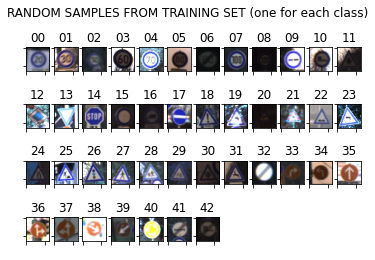

<Figure size 1080x1080 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

rows, cols = 4, 12
fig, ax_array = plt.subplots(rows, cols)
plt.suptitle('RANDOM SAMPLES FROM TRAINING SET (one for each class)')
plt.figure(figsize=(15,15))
plt.tight_layout()
for class_idx, ax in enumerate(ax_array.ravel()):
    if class_idx < n_classes:
        # show a random image of the current class
        cur_X = train_data[train_label == class_idx]
        cur_img = cur_X[np.random.randint(len(cur_X))]
        ax.imshow(cur_img)
        ax.set_title('{:02d}'.format(class_idx))
    else:
        ax.axis('off')
# hide both x and y ticks
plt.setp([a.get_xticklabels() for a in ax_array.ravel()], visible=False)
plt.setp([a.get_yticklabels() for a in ax_array.ravel()], visible=False)
plt.draw()


## bar-chart of classes distribution

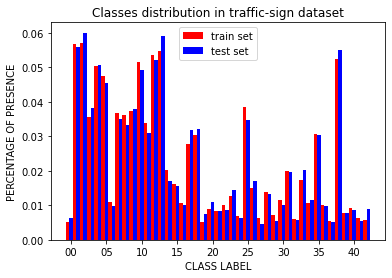

In [13]:

train_distribution, test_distribution = np.zeros(n_classes), np.zeros(n_classes)
for c in range(n_classes):
    train_distribution[c] = np.sum(train_label == c) / n_train
    test_distribution[c] = np.sum(test_label == c) / n_test
fig, ax = plt.subplots()
col_width = 0.5
bar_train = ax.bar(np.arange(n_classes), train_distribution, width=col_width, color='r')
bar_test = ax.bar(np.arange(n_classes)+col_width, test_distribution, width=col_width, color='b')
ax.set_ylabel('PERCENTAGE OF PRESENCE')
ax.set_xlabel('CLASS LABEL')
ax.set_title('Classes distribution in traffic-sign dataset')
ax.set_xticks(np.arange(0, n_classes, 5)+col_width)
ax.set_xticklabels(['{:02d}'.format(c) for c in range(0, n_classes, 5)])
ax.legend((bar_train[0], bar_test[0]), ('train set', 'test set'))
plt.show()

In [14]:
print(type(n_classes),type(train_label[0]), train_label[0:10])
np.array(test_label).shape
xnum = np.zeros(n_classes)

for c in range(n_classes):
    #print(c,f'{c}',train_label[c])
    xnum[c] = np.sum(train_label == f'{c}')
print(xnum)   
print(type(train_data), type(train_label))

<class 'int'> <class 'numpy.int32'> [12 13 31 12  9 31  2  5 10 23]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


In [15]:
'''
#normilize the image data
#X_train_norm = preprocess_features(train_data)
#X_test_norm = preprocess_features(test_data)

equalize_hist = True
X_train_norm = [] # images
for rgb_img in train_data:
    X = rgb_img
#    plt.imshow(X)
#    plt.show()
    yuv = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2YUV)
    ardims = np.expand_dims(yuv[:, :, 0], 2)
    X = np.array([ardims])
    if equalize_hist:
        X = cv2.equalizeHist(np.uint8(X))
    X = np.array(X, dtype='float32')
    X_train_norm.append(X)
print(len(X_train_norm))    

X_test_norm = []
for rgb_img in test_data:
    X = rgb_img
#    plt.imshow(X)
#    plt.show()
    yuv = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2YUV)
    ardims = np.expand_dims(yuv[:, :, 0], 2)
    X = np.array([ardims])
    if equalize_hist:
        X = cv2.equalizeHist(np.uint8(X))
    X = np.array(X, dtype='float32')
    X_test_norm.append(X)
print(len(X_test_norm), X_test_norm[0]) 
print(len(X_train_norm), len(train_data), len(train_label))
'''

"\n#normilize the image data\n#X_train_norm = preprocess_features(train_data)\n#X_test_norm = preprocess_features(test_data)\n\nequalize_hist = True\nX_train_norm = [] # images\nfor rgb_img in train_data:\n    X = rgb_img\n#    plt.imshow(X)\n#    plt.show()\n    yuv = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2YUV)\n    ardims = np.expand_dims(yuv[:, :, 0], 2)\n    X = np.array([ardims])\n    if equalize_hist:\n        X = cv2.equalizeHist(np.uint8(X))\n    X = np.array(X, dtype='float32')\n    X_train_norm.append(X)\nprint(len(X_train_norm))    \n\nX_test_norm = []\nfor rgb_img in test_data:\n    X = rgb_img\n#    plt.imshow(X)\n#    plt.show()\n    yuv = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2YUV)\n    ardims = np.expand_dims(yuv[:, :, 0], 2)\n    X = np.array([ardims])\n    if equalize_hist:\n        X = cv2.equalizeHist(np.uint8(X))\n    X = np.array(X, dtype='float32')\n    X_test_norm.append(X)\nprint(len(X_test_norm), X_test_norm[0]) \nprint(len(X_train_norm), len(train_data), len(train_

# Step3 create a small CNN neural network

In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
# Conv 32x32x1 => 28x28x6.
model.add(layers.Conv2D(filters = 6, kernel_size = (5, 5), strides=(1, 1), padding='valid', 
                        activation='relu', data_format = 'channels_last', input_shape = (32, 32, 3)))
# Maxpool 28x28x6 => 14x14x6
model.add(layers.MaxPooling2D((2, 2)))
# Conv 14x14x6 => 10x10x16
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
# Maxpool 10x10x16 => 5x5x16
model.add(layers.MaxPooling2D((2, 2)))
# Flatten 5x5x16 => 400
model.add(layers.Flatten())
# Fully connected 400 => 120
model.add(layers.Dense(120, activation='relu'))
# Fully connected 120 => 84
model.add(layers.Dense(84, activation='relu'))
# Dropout
model.add(layers.Dropout(0.2))
# Fully connected, output layer 84 => 43
model.add(layers.Dense(43, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

# Step4 Compile this NN and Training

In [37]:
import time

start = time.time()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# training batch_size=128, epochs=10
history = model.fit(train_data, train_label, epochs=20, batch_size=128, validation_split=0.3)

end = time.time()
print("%.2f ms" % (end-start))
print("Traning finished!")

Train on 24696 samples, validate on 10584 samples
Epoch 1/20
24696/24696 [==============================] - 1s 41us/sample - loss: 4.6548 - accuracy: 0.1751 - val_loss: 2.5274 - val_accuracy: 0.3360
Epoch 2/20
24696/24696 [==============================] - 1s 24us/sample - loss: 2.1483 - accuracy: 0.4191 - val_loss: 1.5012 - val_accuracy: 0.5812
Epoch 3/20
24696/24696 [==============================] - 1s 24us/sample - loss: 1.4445 - accuracy: 0.5911 - val_loss: 0.9956 - val_accuracy: 0.7150
Epoch 4/20
24696/24696 [==============================] - 1s 24us/sample - loss: 1.0210 - accuracy: 0.6969 - val_loss: 0.7163 - val_accuracy: 0.8022
Epoch 5/20
24696/24696 [==============================] - 1s 24us/sample - loss: 0.7296 - accuracy: 0.7843 - val_loss: 0.5164 - val_accuracy: 0.8592
Epoch 6/20
24696/24696 [==============================] - 1s 24us/sample - loss: 0.5551 - accuracy: 0.8331 - val_loss: 0.4001 - val_accuracy: 0.8892
Epoch 7/20
24696/24696 [==============================] 

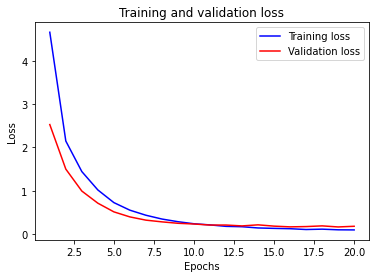

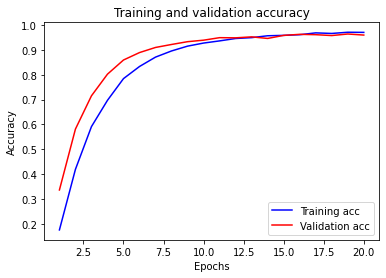

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
#print('val loss', val_loss)
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#accuracy of training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#print('val acc', val_acc)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step5 test on the trained model performance on test data

In [39]:
test_loss, test_acc = model.evaluate(test_data, test_label)
print('test_acc:', test_acc)

3929/3929 [==============================] - 0s 60us/sample - loss: 0.1453 - accuracy: 0.9672
test_acc: 0.9671672


In [89]:
pred_score = model.predict(test_data[:2])
print('\n')
print('predice:', pred_score)
print(np.argmax(pred_score[0]))



predice: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  1.6679108e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [3.1336770e-31 5.9212294e-24 4.5958357e-21 2.7245996e-25 8.9410773e-34
  6.7287379e-21 4.8003966e-22 4.1495488e-23 1.3678298e-28 8.2311413e-23
  1.7478999e-13 5.1014162e-11 2.2551717e-19 9.3647009e-19 5.9010658e-33
  2.5109664e-25 7.0640091e-15 2.0113072e-27 2.1782843e-22 9.9999952e-01
  1.2299960e-09 3.6034011e-09 1.0978350e-25 1.9957173e-07 2.6193685e-09
  3.4476

In [106]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data)
if np.argmax(predictions[0]) == test_label[0]: 
    print("Correct result : ", np.argmax(predictions[0]), "=", test_label[0], ", Class result is : ", class_names[test_label[0]])
else:
    print("Incorrect result : ", np.argmax(predictions[0]), "!=", test_label[0], ", Class is : ", class_names[test_label[0]]) 


Correct result :  9 = 9 , Class result is :  No passing


In [112]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), np.argmax(predictions_array), color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

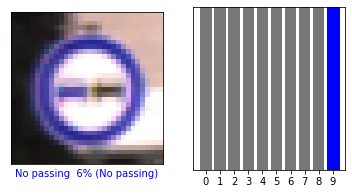

In [127]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()


In [130]:
np.argmax(predictions[1]),np.argmax(pred_score[1])

(19, 19)